In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read in the data

In [9]:
diamonds = pd.read_csv("Diamonds Prices2022.csv")
diamonds.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

### Clean-up and memory optimization

In [10]:
diamonds = diamonds.drop(columns = "Unnamed: 0")
diamonds.info() # no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [11]:
diamonds.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

In [12]:
diamonds["cut"] = diamonds["cut"].astype("category")
diamonds["color"] = diamonds["color"].astype("category")
diamonds["clarity"] = diamonds["clarity"].astype("category")

In [13]:
diamonds.info() # decreased memory by 25%

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53943 non-null  float64 
 1   cut      53943 non-null  category
 2   color    53943 non-null  category
 3   clarity  53943 non-null  category
 4   depth    53943 non-null  float64 
 5   table    53943 non-null  float64 
 6   price    53943 non-null  int64   
 7   x        53943 non-null  float64 
 8   y        53943 non-null  float64 
 9   z        53943 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


## Exploratory Data Analysis

### Dependent Variable Distribution

<AxesSubplot:xlabel='price', ylabel='Count'>

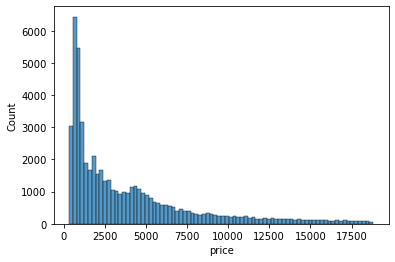

In [14]:
# distribution of prices
sns.histplot(diamonds["price"])

Our dependent variable of `price` is extremely right skewed. Let's attempt some transformations and see if we can find a better distribution to work with.

<AxesSubplot:xlabel='price', ylabel='Count'>

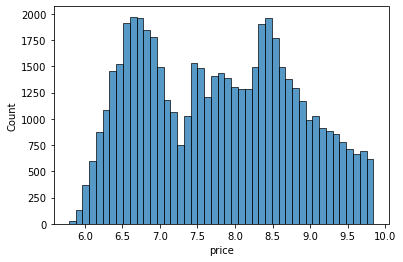

In [15]:
sns.histplot(np.log(diamonds["price"]))

<AxesSubplot:xlabel='price', ylabel='Count'>

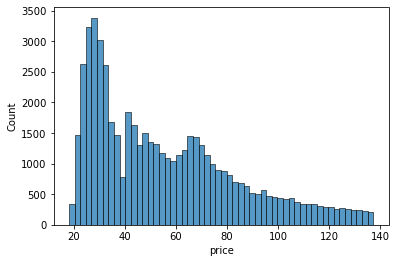

In [16]:
sns.histplot(np.sqrt(diamonds["price"]))

<AxesSubplot:xlabel='price', ylabel='Count'>

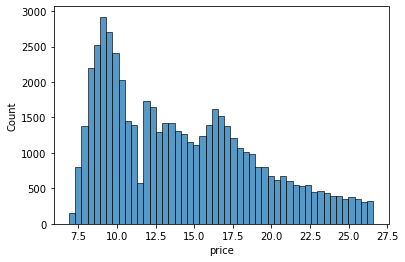

In [17]:
sns.histplot(np.cbrt(diamonds["price"]))

The log-transformation looks the best out of the three above. Moving forward we will log-transform price to use as our dependent variable (`price_log`).

In [18]:
diamonds["price_log"] = np.log(diamonds["price"])
diamonds.head()

carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   

   price_log  
0   5.786897  
1   5.786897  
2   5.789960  
3   5.811141  
4   5.814131

In [19]:
diamonds["price"].median()

2401.0

In [20]:
diamonds["price_log"].median()

7.783640596221253

### Dependent Variable Outliers
After log-transforming `price`, there are no upper or lower outliers in our dependent variable.

In [21]:
Q1 = np.percentile(diamonds["price_log"], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(diamonds["price_log"], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

upper = (Q3+1.5*IQR)
lower = (Q1-1.5*IQR)

mask = diamonds["price_log"] >= upper
diamonds[mask]
# no upper outliers when transformed

Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, price, x, y, z, price_log]
Index: []

In [22]:
mask = diamonds["price_log"] <= lower
diamonds[mask]
# no lower outliers when transformed

Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, price, x, y, z, price_log]
Index: []

## Numeric Features
### Carat
When plotting `carat` against price, we can see a clear relationship where price increases as carat increases. If you have ever bought a diamond before, this follows your intuition. Carat and price are 92% correlated with one another.

<AxesSubplot:xlabel='carat', ylabel='price_log'>

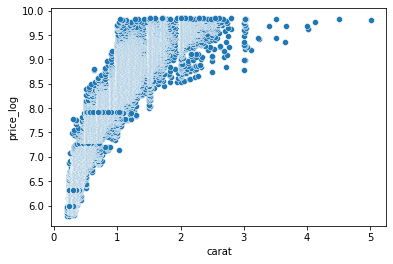

In [23]:
sns.scatterplot(x = "carat", y = "price_log", data = diamonds)
# price increases steeply as carat increases, and becomes more disperse as prices are higher

In [24]:
diamonds[["carat", "price_log"]].corr() # highly correlated

carat  price_log
carat      1.000000   0.920204
price_log  0.920204   1.000000

### Depth
There is not much to takeaway from the plot of `depth` vs. price. There is virtually a 0% correlation between depth and price.

<AxesSubplot:xlabel='depth', ylabel='price_log'>

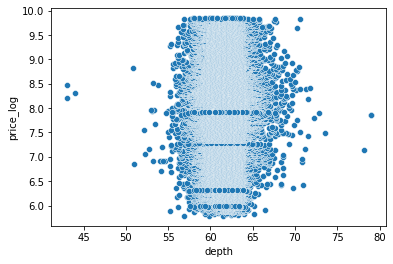

In [25]:
sns.scatterplot(x = "depth", y = "price_log", data = diamonds)

In [26]:
diamonds[["depth", "price_log"]].corr() # almost 0 correlation

depth  price_log
depth      1.000000   0.000852
price_log  0.000852   1.000000

### Table
The `table` plot is very similar to what we saw above with depth as there is no clear relationship visually. There is only a ~16% correlation between table and price.

<AxesSubplot:xlabel='table', ylabel='price_log'>

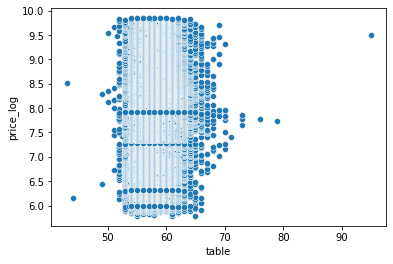

In [27]:
sns.scatterplot(x = "table", y = "price_log", data = diamonds)


In [28]:
diamonds[["table", "price_log"]].corr() # some but little correlation

table  price_log
table      1.000000   0.158203
price_log  0.158203   1.000000

### `x`
There is a clear relationship between `x` and price where price increases as x increases. Intuitively this makes sense as we would assume as x gets bigger, the size of the diamond gets bigger, and the price of the diamond goes up. There is a 96% correlation between x and price.

It was also found that a handful of rows had x = 0.0. I considered this to be bad data and removed the rows from our dataset.

<AxesSubplot:xlabel='x', ylabel='price_log'>

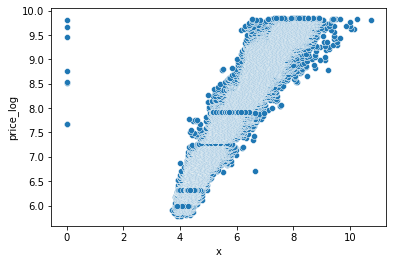

In [29]:
sns.scatterplot(x = "x", y = "price_log", data = diamonds)

In [30]:
mask = diamonds["x"] == 0
diamonds[mask]

carat        cut color clarity  depth  table  price    x     y    z  \
11182   1.07      Ideal     F     SI2   61.6   56.0   4954  0.0  6.62  0.0   
11963   1.00  Very Good     H     VS2   63.3   53.0   5139  0.0  0.00  0.0   
15951   1.14       Fair     G     VS1   57.5   67.0   6381  0.0  0.00  0.0   
24520   1.56      Ideal     G     VS2   62.2   54.0  12800  0.0  0.00  0.0   
26243   1.20    Premium     D    VVS1   62.1   59.0  15686  0.0  0.00  0.0   
27429   2.25    Premium     H     SI2   62.8   59.0  18034  0.0  0.00  0.0   
49556   0.71       Good     F     SI2   64.1   60.0   2130  0.0  0.00  0.0   
49557   0.71       Good     F     SI2   64.1   60.0   2130  0.0  0.00  0.0   

       price_log  
11182   8.507951  
11963   8.544614  
15951   8.761080  
24520   9.457200  
26243   9.660524  
27429   9.800014  
49556   7.663877  
49557   7.663877

In [31]:
mask = diamonds["x"] != 0
diamonds = diamonds[mask]
# removing diamonds where x = 0

In [32]:
diamonds[["x", "price_log"]].corr() # highly correlated

x  price_log
x          1.000000   0.960704
price_log  0.960704   1.000000

### `y`
There is also a clear relationship between `y` and price. There is a 94% correlation between y and price.

<AxesSubplot:xlabel='y', ylabel='price_log'>

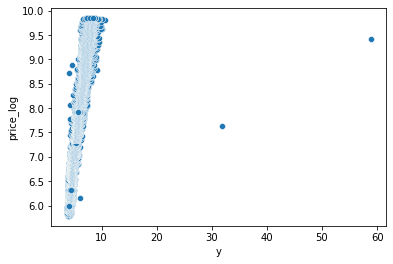

In [33]:
sns.scatterplot(x = "y", y = "price_log", data = diamonds)

In [34]:
mask = diamonds["y"] == 0
diamonds[mask]

Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, price, x, y, z, price_log]
Index: []

In [35]:
diamonds[["y", "price_log"]].corr() # highly correlated

y  price_log
y          1.000000   0.938455
price_log  0.938455   1.000000

### `z`
Similarly, there is a clear visual relationship between `z` and price, again with price increasing as z increases. There is a 94% correlation between z and price.

Again, I removed any rows where z = 0 as I considered it to be bad data.

<AxesSubplot:xlabel='z', ylabel='price_log'>

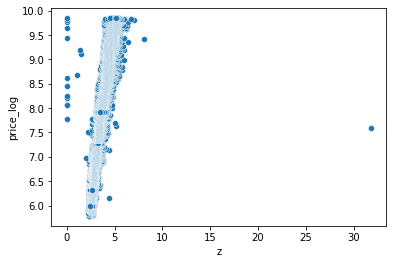

In [36]:
sns.scatterplot(x = "z", y = "price_log", data = diamonds)

In [37]:
mask = diamonds["z"] == 0
diamonds[mask]

carat      cut color clarity  depth  table  price     x     y    z  \
2207    1.00  Premium     G     SI2   59.1   59.0   3142  6.55  6.48  0.0   
2314    1.01  Premium     H      I1   58.1   59.0   3167  6.66  6.60  0.0   
4791    1.10  Premium     G     SI2   63.0   59.0   3696  6.50  6.47  0.0   
5471    1.01  Premium     F     SI2   59.2   58.0   3837  6.50  6.47  0.0   
10167   1.50     Good     G      I1   64.0   61.0   4731  7.15  7.04  0.0   
13601   1.15    Ideal     G     VS2   59.2   56.0   5564  6.88  6.83  0.0   
24394   2.18  Premium     H     SI2   59.4   61.0  12631  8.49  8.45  0.0   
26123   2.25  Premium     I     SI1   61.3   58.0  15397  8.52  8.42  0.0   
27112   2.20  Premium     H     SI1   61.2   59.0  17265  8.42  8.37  0.0   
27503   2.02  Premium     H     VS2   62.7   53.0  18207  8.02  7.95  0.0   
27739   2.80     Good     G     SI2   63.8   58.0  18788  8.90  8.85  0.0   
51506   1.12  Premium     G      I1   60.4   59.0   2383  6.71  6.67  0.0   

       price_log  
2207    8.052615  
2314    8.060540  
4791    8.215006  
5471    8.252446  
10167   8.461892  
13601   8.624073  
24394   9.443909  
26123   9.641928  
27112   9.756437  
27503   9.809561  
27739   9.840974  
51506   7.776115

In [38]:
mask = diamonds["z"] != 0
diamonds = diamonds[mask]
# removing diamonds where z = 0

In [39]:
diamonds[["z", "price_log"]].corr() # highly correlated

z  price_log
z          1.00000    0.94175
price_log  0.94175    1.00000

### Numeric Feature Correlations
Looking at our numeric predictors, we can see that our "size" features are correlated with one another. These would be `carat`, `x`, `y`, and `z`. Each of these predictors is also highly correlated with our dependent variable.

In [40]:
diamonds.corr()
# x, y, z are each correlated with one another
# carat is correlated with x, y, and z

carat     depth     table     price         x         y  \
carat      1.000000  0.028269  0.181630  0.921592  0.977777  0.953990   
depth      0.028269  1.000000 -0.295753 -0.010712 -0.025017 -0.029068   
table      0.181630 -0.295753  1.000000  0.127229  0.196086  0.184484   
price      0.921592 -0.010712  0.127229  1.000000  0.887229  0.867862   
x          0.977777 -0.025017  0.196086  0.887229  1.000000  0.974918   
y          0.953990 -0.029068  0.184484  0.867862  0.974918  1.000000   
z          0.961047  0.095026  0.152469  0.868206  0.975435  0.956743   
price_log  0.920250  0.000888  0.158232  0.895798  0.960719  0.938452   

                  z  price_log  
carat      0.961047   0.920250  
depth      0.095026   0.000888  
table      0.152469   0.158232  
price      0.868206   0.895798  
x          0.975435   0.960719  
y          0.956743   0.938452  
z          1.000000   0.941750  
price_log  0.941750   1.000000

## Categorical Features
### Cut
Looking at `cut` its found that the majority of the diamonds in our dataset are Ideal cut. Running an ANOVA test shows us that means are statistically different across the different cuts.

<AxesSubplot:xlabel='cut', ylabel='count'>

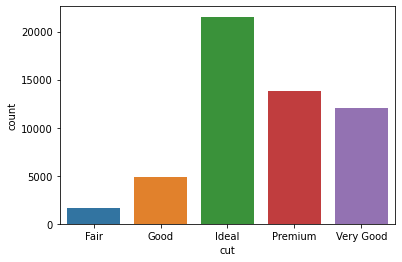

In [41]:
sns.countplot(x = "cut", data = diamonds)

<AxesSubplot:xlabel='cut', ylabel='price_log'>

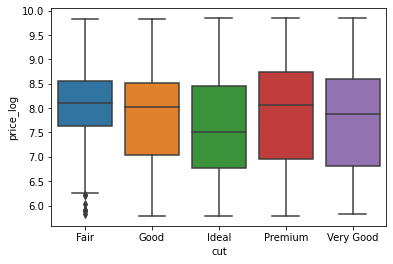

In [42]:
sns.boxplot(x = "cut", y = "price_log", data = diamonds)

In [43]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('price_log ~ C(cut)', data = diamonds).fit()
anova_table = sm.stats.anova_lm(model, typ = 2)
anova_table

sum_sq       df           F         PR(>F)
C(cut)     1003.545353      4.0  248.230335  1.096356e-211
Residual  54494.909211  53918.0         NaN            NaN

### Color
The middle `color` grade of G is our most common color. We see there are more diamonds on the higher grade side (closer to D) than the lower end (closer to J).

When looking at the boxplot I was suprised to see that the price increased the closer the color grade was to J. I was expecting to see higher prices for higher grades, the opposite of what was found. Perhaps diamonds that are very large and expensive usually aren't graded well for color?

The ANOVA test shows that the means are statistically different across colors.

<AxesSubplot:xlabel='color', ylabel='count'>

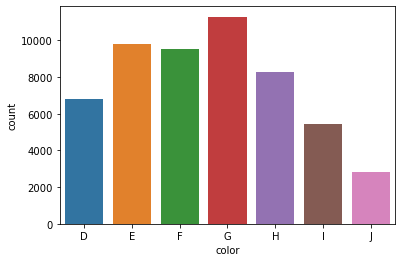

In [44]:
sns.countplot(x = "color", data = diamonds)

<AxesSubplot:xlabel='color', ylabel='price_log'>

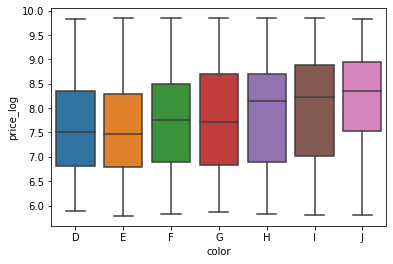

In [45]:
sns.boxplot(x = "color", y = "price_log", data = diamonds)

In [46]:
model = ols('price_log ~ C(color)', data = diamonds).fit()
anova_table = sm.stats.anova_lm(model, typ = 2)
anova_table

sum_sq       df           F         PR(>F)
C(color)   1428.724896      6.0  237.443797  1.091439e-300
Residual  54069.729668  53916.0         NaN            NaN

### Clarity
The countplot shows that most diamonds are between SI1 and VS2 for `clarity`. There does seem to be somewhat of a trend of price decreasing as the clarity grade goes down (closer to VVS2). The ANOVA test shows that the means are statistically different across clarity grades.

<AxesSubplot:xlabel='clarity', ylabel='count'>

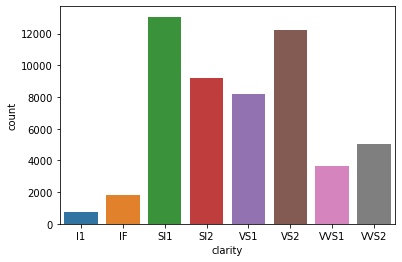

In [47]:
sns.countplot(x = "clarity", data = diamonds)

<AxesSubplot:xlabel='clarity', ylabel='price_log'>

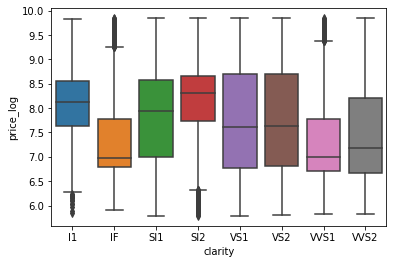

In [48]:
sns.boxplot(x = "clarity", y = "price_log", data = diamonds)

In [49]:
model = ols('price_log ~ C(clarity)', data = diamonds).fit()
anova_table = sm.stats.anova_lm(model, typ = 2)
anova_table

sum_sq       df           F  PR(>F)
C(clarity)   2834.102261      7.0  414.486451     0.0
Residual    52664.352304  53915.0         NaN     NaN

### Dummy Variables
Create dummy variables for our categorical variables: `cut`, `color`, and `clarity`.

In [50]:
df_cut = pd.get_dummies(diamonds["cut"])
df_color = pd.get_dummies(diamonds["color"])
df_clarity = pd.get_dummies(diamonds["clarity"])

diamonds_dummy = pd.concat([diamonds, 
           df_cut,
           df_color,
           df_clarity], 
          axis = 1).drop(columns = ["cut",
                                    "color",
                                    "clarity",
                                    "price"])
diamonds_dummy.head()

carat  depth  table     x     y     z  price_log  Fair  Good  Ideal  ...  \
0   0.23   61.5   55.0  3.95  3.98  2.43   5.786897     0     0      1  ...   
1   0.21   59.8   61.0  3.89  3.84  2.31   5.786897     0     0      0  ...   
2   0.23   56.9   65.0  4.05  4.07  2.31   5.789960     0     1      0  ...   
3   0.29   62.4   58.0  4.20  4.23  2.63   5.811141     0     0      0  ...   
4   0.31   63.3   58.0  4.34  4.35  2.75   5.814131     0     1      0  ...   

   I  J  I1  IF  SI1  SI2  VS1  VS2  VVS1  VVS2  
0  0  0   0   0    0    1    0    0     0     0  
1  0  0   0   0    1    0    0    0     0     0  
2  0  0   0   0    0    0    1    0     0     0  
3  1  0   0   0    0    0    0    1     0     0  
4  0  1   0   0    0    1    0    0     0     0  

[5 rows x 27 columns]

## Modeling
### Train & Test Split

In [92]:
from sklearn.model_selection import train_test_split

X = diamonds_dummy.drop("price_log", axis = "columns")
y = diamonds_dummy["price_log"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## Random Forest

In [93]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 777).fit(X_train, y_train)

### Performance
The training and test set both performed extremely well in R^2 with no indication of overfitting.

Normally performance this high would leave me skeptical, but seeing how highly correlated our size features were with price in the EDA eases my skepticism. Seeing a handful of data points relatively far away from the "perfect" blue line in the actual vs. prediction plot below is also encouraging that there isn't any data leakage happening here. Bottom line, it appears these features are very predictive of diamond price.

In [94]:
model.score(X_train, y_train)

0.9988279495410571

In [95]:
model.score(X_test, y_test)

0.9915075647094683

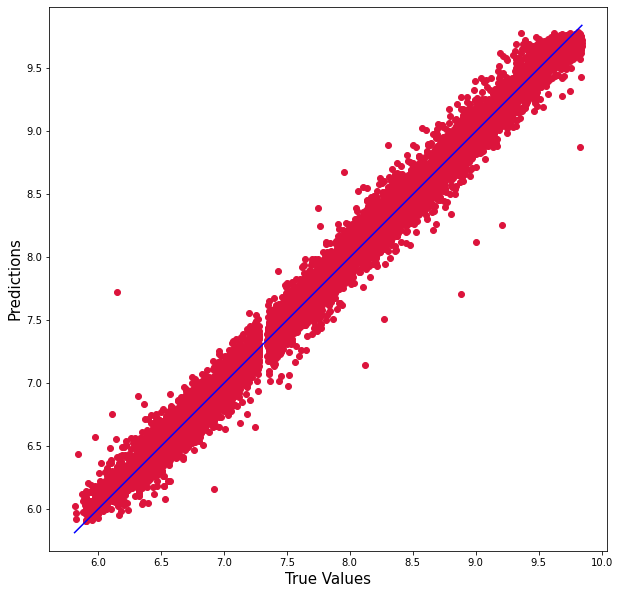

In [96]:
y_pred = model.predict(X_test)

plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

## Xgboost

In [97]:
import xgboost as xgb

model = xgb.XGBRegressor(use_label_encoder = False, random_state = 777).fit(X_train, y_train)

### Performance
Performance for the xgboost model is very similar to the random forest above, just barely outperforming in R^2.

You can see that the points away from the blue line in the plot below have slightly less spread than the same points in the random forest model above.

In [98]:
model.score(X_train, y_train)

0.9943512667334077

In [99]:
model.score(X_test, y_test)

0.991953567944955

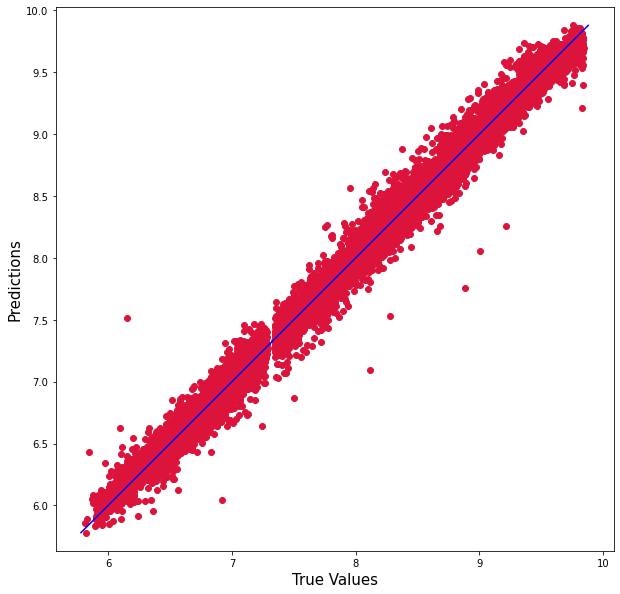

In [100]:
y_pred = model.predict(X_test)

plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

### Feature Importance
There is no surprise in our top 3 features, `y`, `x`, and `carat`. However, seeing `depth` and number 4 was surprising as we didn't find much relationship between it and price in our EDA. Depth must be interacting with the other features in an important manner.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

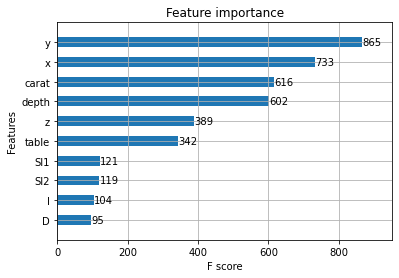

In [101]:
from xgboost import plot_importance

plot_importance(model, max_num_features = 10, height = 0.5)